In [3]:
from sympy import symbols, Matrix, diff, Or, Le
import matlab.engine
import numpy as np
from SOSPy import *
import time

### Main Algorithm - Time Dependent Controller Synthesis

In [4]:
def monolist(var, deg):
    n = len(var)
    power = eng.monpowers(n,deg)
    mon_list = []
    for i in range(len(power)):
        temp = 1
        for j in range(len(power[i])):
            if power[i][j] > 0:
                temp = temp * var[j]**int(power[i][j])
        mon_list.append(temp)
    return mon_list
    #print(int(power[0][0]))


def TimeRelevantApprox(x,var_list, E, f, pred1, pred2, k, deg, prt = 0, show_result = 1):

    n = len(x) # number of variables
    m = len(E) # number of modes

    mon_list = monolist(x,deg)

    #X = [[False for switch_time in range(k)] for q in range(m)] # time-relevant predicate - X[q][switch_time]
    X = [[None]*k for q in range(m)] # time-relevant predicate - X[q][switch_time]
    Init = [[None]*k for q in range(m) ] # initial condition include at leat i times switch - Init[q][switch_time]
    Jump = [[[None]*k for post_q in range(m)] for q in range(m)] # time-relevant switch condition corresponding to init - Jump[q][post_q][switch_time]

    for q in range(m):
        print(f"=========================X_{q}^0=========================")
        X[q][0] = np.array(eng.StateApprox(var_list, f[q], pred1, pred2, deg, prt))
        init_temp = []
        for element in X[q][0]:
            temp_exp = element.dot(mon_list)
            #display(Le(temp_exp,0))
            #print(element)
            init_temp.append(Le(temp_exp.subs(x[n-1],0),0))
        Init[q][0] = init_temp
        #print(X[q][0])
        #display(Init[q][0])
          
    i = 1
    while(i < k):
        for q in range(m):
            print(f"=========================X_{q}^{i}=========================")
            temp = []
            for post_q in range(m):
                if (E[q][post_q]):
                    for element in X[post_q][i-1]:
                        #print(element)
                        temp.append(element)
                    #print(temp)
                    jump_temp = []
                    for element in X[post_q][i-1]:
                        jump_temp.append(Le(element.dot(mon_list),0))
                    Jump[q][post_q][i] = jump_temp
            #print(f"Predicate 2 in the approximation of X_{q}^{i} : {np.array(temp)}")
            X[q][i] = np.array(eng.StateApprox(var_list, f[q], pred1, np.array(temp), deg, prt))
            init_temp = []
            for element in X[q][i]:
                #print(element)
                temp_exp = element.dot(mon_list)
                #display(Le(temp_exp,0))
                init_temp.append(Le(temp_exp.subs(x[n-1],0),0))
            Init[q][i] = init_temp
            #print(X[q][i])
        i = i + 1 
    return X, Init, Jump



### Van der Pol Oscillator 

#### 3-modes

In [5]:
deg = 4
k = 6
eng = matlab.engine.start_matlab()
print("MATLAB Engine have been Started")

var_list = ["x","y","t"]
f = [["-2*y", "0.8*x + 10*(x^2 - 0.21)*y", "1"],
     ["-2*y", "0.8*x +  9*(x^2 - 0.21)*y", "1"],
     ["-2*y", "0.9*x + 10*(x^2 - 0.21)*y", "1"]]
pred1 = ["x^2 + y^2 - 1", "-t", "t-4"]
pred2 = ["x^2 + y^2 - 0.01", "3-t", "t-4"] 

E = [[0,1,1],
     [0,0,1],
     [1,0,0]]

x,y,t = symbols('x,y,t')

#eng.eval("yalmip('clear')", nargout=0)

start1 = time.perf_counter()
X, Init, Jump = TimeRelevantApprox([x,y,t], var_list, E, f, pred1, pred2, k, deg)
end1 = time.perf_counter()

print(f"Total time : {end1-start1}s")
eng.quit()


MATLAB Engine have been Started
=========================X_0^0=========================
=========================X_1^0=========================
=========================X_2^0=========================
=========================X_0^1=========================
=========================X_1^1=========================
=========================X_2^1=========================
=========================X_0^2=========================
=========================X_1^2=========================
=========================X_2^2=========================
=========================X_0^3=========================
=========================X_1^3=========================
=========================X_2^3=========================
=========================X_0^4=========================
=========================X_1^4=========================
=========================X_2^4=========================
=========================X_0^5=========================
=========================X_1^5=========================
================

#### 4-modes

In [6]:
deg = 4
k = 6
eng = matlab.engine.start_matlab()
print("MATLAB Engine have been Started")

var_list = ["x","y","t"]
f = [["-2*y", "0.8*x + 10*(x^2 - 0.21)*y", "1"],
     ["-1*y", "0.8*x +  9*(x^2 - 0.21)*y", "1"],
     ["-2*y", "0.9*x + 10*(x^2 - 0.21)*y", "1"],
     [ "2*y", "1.2*x + 9*(x^2 - 0.31)*y", "1"]]
pred1 = ["x^2 + y^2 - 1", "-t", "t-4"]
pred2 = ["x^2 + y^2 - 0.01", "3-t", "t-4"] 

E = [[0,1,1,0],
     [0,0,1,0],
     [1,0,0,1],
     [1,0,0,0]]

x,y,t = symbols('x,y,t')

start1 = time.perf_counter()
X, Init, Jump = TimeRelevantApprox([x,y,t], var_list, E, f, pred1, pred2, 6, 4)
end1 = time.perf_counter()

print(f"Total time : {end1-start1}s")
eng.quit()

MATLAB Engine have been Started
=========================X_0^0=========================
=========================X_1^0=========================
=========================X_2^0=========================
=========================X_3^0=========================
=========================X_0^1=========================
=========================X_1^1=========================
=========================X_2^1=========================
=========================X_3^1=========================
=========================X_0^2=========================
=========================X_1^2=========================
=========================X_2^2=========================
=========================X_3^2=========================
=========================X_0^3=========================
=========================X_1^3=========================
=========================X_2^3=========================
=========================X_3^3=========================
=========================X_0^4=========================
================

#### 5-modes

In [7]:
eng = matlab.engine.start_matlab()
deg = 4
k = 6
print("MATLAB Engine have been Started")

var_list = ["x","y","t"]
f = [["-2*y", "0.8*x + 10*(x^2 - 0.21)*y", "1"],
     ["-1*y", "0.8*x +  9*(x^2 - 0.21)*y", "1"],
     ["-2*y", "0.9*x + 10*(x^2 - 0.21)*y", "1"],
     [ "2*y", "1.2*x + 9*(x^2 - 0.31)*y", "1"],
     ["-2*y", "0.4*x + 14*(x^2 - 0.11)*y", "1"]]
pred1 = ["x^2 + y^2 - 1", "-t", "t-4"]
pred2 = ["x^2 + y^2 - 0.01", "3-t", "t-4"] 

E = [[0,1,1,0,0],
     [0,0,1,0,0],
     [1,0,0,1,0],
     [0,0,1,0,1],
     [1,0,0,0,0]]

x,y,t = symbols('x,y,t')

start1 = time.perf_counter()
X, Init, Jump = TimeRelevantApprox([x,y,t], var_list, E, f, pred1, pred2, k, deg)
end1 = time.perf_counter()

print(f"Total time : {end1-start1}s")
eng.quit()

MATLAB Engine have been Started
=========================X_0^0=========================
=========================X_1^0=========================
=========================X_2^0=========================
=========================X_3^0=========================
=========================X_4^0=========================
=========================X_0^1=========================
=========================X_1^1=========================
=========================X_2^1=========================
=========================X_3^1=========================
=========================X_4^1=========================
=========================X_0^2=========================
=========================X_1^2=========================
=========================X_2^2=========================
=========================X_3^2=========================
=========================X_4^2=========================
=========================X_0^3=========================
=========================X_1^3=========================
================

### Thermostat Controller

#### STL - 1

In [8]:
k = 5
deg = 3
var_list = ["x","y","z","t"]
f = [["-0.8*x + 0.2*y + 0.2*z + 12", "0.2*x - 0.8*y + 0.2*z + 12", "0.2*x + 0.2*y - 0.8*z + 12", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 12", "0.2*x - 0.8*y + 0.2*z + 12", "0.2*x + 0.2*y - 0.8*z + 4", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 12", "0.2*x - 0.8*y + 0.2*z + 4", "0.2*x + 0.2*y - 0.8*z + 12", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 12", "0.2*x - 0.8*y + 0.2*z + 4", "0.2*x + 0.2*y - 0.8*z + 4", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 4", "0.2*x - 0.8*y + 0.2*z + 12", "0.2*x + 0.2*y - 0.8*z + 12", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 4", "0.2*x - 0.8*y + 0.2*z + 12", "0.2*x + 0.2*y - 0.8*z + 4", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 4", "0.2*x - 0.8*y + 0.2*z + 4", "0.2*x + 0.2*y - 0.8*z + 12", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 4", "0.2*x - 0.8*y + 0.2*z + 4", "0.2*x + 0.2*y - 0.8*z + 4", "1"]]
#f = ["1 + 0.2*(x2 + x3 - 2*x1)", "1 + 0.2*(x1 + x3 - 2*x2)", "1 + 0.2(x1 + x2 - 2*x3)", "1"]
#pred1 = ["11 - x", "x - 28", "11 - y", "y - 28", "11 - z", "z - 28", "-t", "t - 10"]
#pred2 = ["23 - x", "x - 26", "23 - y", "y - 26", "23 - z", "z - 26", "8 - t", "t - 10"]
pred1 = ["(x-26)^2 + (y-26)^2 + (z-26)^2 - 9", "-t", "t - 10"]
#pred2 = ["(x-26)^2 + (y-26)^2 + (z-26)^2 - 1", "8 - t", "t - 10"]
pred2 = ["(x-27)^2 + (y-27)^2 + (z-27)^2 -1", "8 - t", "t - 10"]

E = [[0,1,0,0,1,0,0,0],
     [1,0,0,0,0,1,0,0],
     [0,0,0,1,0,0,1,0],
     [0,0,1,0,0,0,0,1],
     [1,0,0,0,0,0,1,0],
     [0,0,0,0,1,0,0,1],
     [0,0,1,0,1,0,0,0],
     [0,0,0,0,0,1,0,0]]

x,y,z,t = symbols('x,y,z,t')

eng = matlab.engine.start_matlab()
print("MATLAB Engine have been Started")

start1 = time.perf_counter()
X, Init, Jump = TimeRelevantApprox([x,y,z,t], var_list, E, f, pred1, pred2, k, deg)
end1 = time.perf_counter()

eng.quit()

print(f"Total time : {end1-start1}s")


MATLAB Engine have been Started
=========================X_0^0=========================
=========================X_1^0=========================
=========================X_2^0=========================
=========================X_3^0=========================
=========================X_4^0=========================
=========================X_5^0=========================
=========================X_6^0=========================
=========================X_7^0=========================
=========================X_0^1=========================
=========================X_1^1=========================
=========================X_2^1=========================
=========================X_3^1=========================
=========================X_4^1=========================
=========================X_5^1=========================
=========================X_6^1=========================
=========================X_7^1=========================
=========================X_0^2=========================
================

#### STL - 2

In [9]:
k = 5
deg = 3
var_list = ["x","y","z","t"]
f = [["-0.8*x + 0.2*y + 0.2*z + 12", "0.2*x - 0.8*y + 0.2*z + 12", "0.2*x + 0.2*y - 0.8*z + 12", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 12", "0.2*x - 0.8*y + 0.2*z + 12", "0.2*x + 0.2*y - 0.8*z + 4", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 12", "0.2*x - 0.8*y + 0.2*z + 4", "0.2*x + 0.2*y - 0.8*z + 12", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 12", "0.2*x - 0.8*y + 0.2*z + 4", "0.2*x + 0.2*y - 0.8*z + 4", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 4", "0.2*x - 0.8*y + 0.2*z + 12", "0.2*x + 0.2*y - 0.8*z + 12", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 4", "0.2*x - 0.8*y + 0.2*z + 12", "0.2*x + 0.2*y - 0.8*z + 4", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 4", "0.2*x - 0.8*y + 0.2*z + 4", "0.2*x + 0.2*y - 0.8*z + 12", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 4", "0.2*x - 0.8*y + 0.2*z + 4", "0.2*x + 0.2*y - 0.8*z + 4", "1"]]
#f = ["1 + 0.2*(x2 + x3 - 2*x1)", "1 + 0.2*(x1 + x3 - 2*x2)", "1 + 0.2(x1 + x2 - 2*x3)", "1"]
#pred1 = ["11 - x", "x - 27", "10 - y", "y - 27", "10 - z", "z - 27", "-t", "t - 10"]
#pred2 = ["23 - x", "x - 26", "23 - y", "y - 26", "23 - z", "z - 26", "8 - t", "t - 10"]
#pred1 = ["(x-26)^2 + (y-26)^2 + (z-26)^2 - 4", "-t", "t - 10"]
#pred2 = ["26 - x", "x - 28", "26 - y", "y - 28", "8 - t", "t - 10"]

pred1 = ["(x-26)^2 + (y-26)^2 + (z-26)^2 - 9", "-t", "t - 10"]
pred2 = ["(x-27)^2 + (y-27)^2 + (z-27)^2 - 1", "y - x", "8 - t", "t - 10"]

E = [[0,1,0,0,1,0,0,0],
     [1,0,0,0,0,1,0,0],
     [0,0,0,1,0,0,1,0],
     [0,0,1,0,0,0,0,1],
     [1,0,0,0,0,0,1,0],
     [0,0,0,0,1,0,0,1],
     [0,0,1,0,1,0,0,0],
     [0,0,0,0,0,1,0,0]]

x,y,z,t = symbols('x,y,z,t')

eng = matlab.engine.start_matlab()
print("MATLAB Engine have been Started")

start1 = time.perf_counter()
X, Init, Jump = TimeRelevantApprox([x,y,z,t], var_list, E, f, pred1, pred2, k, deg)
end1 = time.perf_counter()

eng.quit()

print(f"Total time : {end1-start1}s")


MATLAB Engine have been Started
=========================X_0^0=========================
=========================X_1^0=========================
=========================X_2^0=========================
=========================X_3^0=========================
=========================X_4^0=========================
=========================X_5^0=========================
=========================X_6^0=========================
=========================X_7^0=========================
=========================X_0^1=========================
=========================X_1^1=========================
=========================X_2^1=========================
=========================X_3^1=========================
=========================X_4^1=========================
=========================X_5^1=========================
=========================X_6^1=========================
=========================X_7^1=========================
=========================X_0^2=========================
================

#### STL - 3

In [10]:
k = 5
deg = 3
var_list = ["x","y","z","t"]
f = [["-0.8*x + 0.2*y + 0.2*z + 12", "0.2*x - 0.8*y + 0.2*z + 12", "0.2*x + 0.2*y - 0.8*z + 12", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 12", "0.2*x - 0.8*y + 0.2*z + 12", "0.2*x + 0.2*y - 0.8*z + 4", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 12", "0.2*x - 0.8*y + 0.2*z + 4", "0.2*x + 0.2*y - 0.8*z + 12", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 12", "0.2*x - 0.8*y + 0.2*z + 4", "0.2*x + 0.2*y - 0.8*z + 4", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 4", "0.2*x - 0.8*y + 0.2*z + 12", "0.2*x + 0.2*y - 0.8*z + 12", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 4", "0.2*x - 0.8*y + 0.2*z + 12", "0.2*x + 0.2*y - 0.8*z + 4", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 4", "0.2*x - 0.8*y + 0.2*z + 4", "0.2*x + 0.2*y - 0.8*z + 12", "1"],
     ["-0.8*x + 0.2*y + 0.2*z + 4", "0.2*x - 0.8*y + 0.2*z + 4", "0.2*x + 0.2*y - 0.8*z + 4", "1"]]
#f = ["1 + 0.2*(x2 + x3 - 2*x1)", "1 + 0.2*(x1 + x3 - 2*x2)", "1 + 0.2(x1 + x2 - 2*x3)", "1"]
#pred1 = ["11 - x", "x - 27", "10 - y", "y - 27", "10 - z", "z - 27", "-t", "t - 10"]
#pred2 = ["23 - x", "x - 26", "23 - y", "y - 26", "23 - z", "z - 26", "8 - t", "t - 10"]
#pred1 = ["(x-26)^2 + (y-26)^2 + (z-26)^2 - 4", "-t", "t - 10"]
#pred2 = ["26 - x", "x - 28", "26 - y", "y - 28", "8 - t", "t - 10"]

pred1 = ["(x-26)^2 + (y-26)^2 + (z-26)^2 - 9", "-t", "t - 10"]
pred2 = ["(x-27)^2 + (y-27)^2 + (z-27)^2 - 1", "y - x", "z - y", "8 - t", "t - 10"]

E = [[0,1,0,0,1,0,0,0],
     [1,0,0,0,0,1,0,0],
     [0,0,0,1,0,0,1,0],
     [0,0,1,0,0,0,0,1],
     [1,0,0,0,0,0,1,0],
     [0,0,0,0,1,0,0,1],
     [0,0,1,0,1,0,0,0],
     [0,0,0,0,0,1,0,0]]

x,y,z,t = symbols('x,y,z,t')

eng = matlab.engine.start_matlab()
print("MATLAB Engine have been Started")

start1 = time.perf_counter()
X, Init, Jump = TimeRelevantApprox([x,y,z,t], var_list, E, f, pred1, pred2, k, deg)
end1 = time.perf_counter()

eng.quit()

print(f"Total time : {end1-start1}s")


MATLAB Engine have been Started
=========================X_0^0=========================
=========================X_1^0=========================
=========================X_2^0=========================
=========================X_3^0=========================
=========================X_4^0=========================
=========================X_5^0=========================
=========================X_6^0=========================
=========================X_7^0=========================
=========================X_0^1=========================
=========================X_1^1=========================
=========================X_2^1=========================
=========================X_3^1=========================
=========================X_4^1=========================
=========================X_5^1=========================
=========================X_6^1=========================
=========================X_7^1=========================
=========================X_0^2=========================
================

### A Python Version of Function 'StateAppro' ( abandoned due to low efficiency )

In [115]:
def StateAppro(f, pred1, pred2, varible, deg):
    
    l_pred1 = len(pred1)
    l_pred2 = len(pred2)
    
    # Init the SOS program
    vartable = varible
    prog = sosprogram(vartable)

    prog, v = sospolyvar(prog, monomials(vartable,range(deg)))
    prog, w = sospolyvar(prog, monomials(vartable,range(deg)))

    #print(v)
    
    Lie_v = Matrix([diff(v,var) for var in vartable]).dot(f)
    Lie_w = Matrix([diff(w,var) for var in vartable]).dot(f)

    deg1 = deg+2


    # Constrains
    s0 = [1 for i in range(l_pred1+l_pred2)]
    constr0 = -Lie_v
    #print(constr0)
    for i in range(l_pred1):
        prog, s0[i] = sospolyvar(prog,monomials(vartable,range(deg1)))
        prog = sosineq(prog,s0[i])
        constr0 = constr0 + s0[i]*pred1[i]
        #print(i)
    for i in range(l_pred1,l_pred1+l_pred2):
        #print(i-l_pred1)
        prog, s0[i] = sospolyvar(prog,monomials(vartable,range(deg1)))
        constr0 = constr0 - s0[i]*pred2[i-l_pred1]
        prog = sosineq(prog,s0[i])
    #print(constr0)
    prog = sosineq(prog,constr0)

    s1 = [1 for i in range(l_pred1+l_pred2)]
    constr1 = v - Lie_w
    for i in range(l_pred1):
        prog, s1[i] = sospolyvar(prog,monomials(vartable,range(deg1)))
        constr1 = constr1 + s1[i]*pred1[i]
        prog = sosineq(prog,s1[i])
    for i in range(l_pred1,l_pred1+l_pred2):
        prog, s1[i] = sospolyvar(prog,monomials(vartable,range(deg1)))
        constr1 = constr1 - s1[i]*pred2[i-l_pred1]
        prog = sosineq(prog,s1[i])
    prog = sosineq(prog,constr1)

    s2 = [1 for i in range(l_pred1)]
    constr2 = v
    for i in range(l_pred1):
        prog, s2[i] = sospolyvar(prog,monomials(vartable,range(deg1)))
        constr2 = constr2 - s2[i]*pred1[i]
    prog = sosineq(prog,constr2)

    #prog = sossetobj(prog,gamma)

    options = {}
    options['solver'] = 'mosek'
    #options['abstol'] = 1e-4
    #options['reltol'] = 1e-4
    #options['feastol'] = 1e-4
    prog = sossolve(prog,options,verbose=0)

    return sosgetsol(prog,v,'v')


In [175]:
X,T = symbols("X,T")

f = Matrix([20 - 0.2*X,1])
pred1 = [(1/120)*T**2 + (1/1600)*X**2 - (1/20)*T - (1/16)*X + 1]
pred2 = [(1/73)*T**2 - (10/73)*T + (1/7300)*X**2 - (140/7300)*X + 1]

v = StateAppro(f,pred1,pred2,[X,T],8)
print(v)

Installed SDP solvers:  ['MOSEK', 'CVXOPT', 'SCS']

 Residual norm 5.734472736815547e-08
cpusec: 0.16926
iter: 14
feasratio: 1.0
pinf: 0
dinf: 0


<IPython.core.display.Math object>

-0.05504*T**7 - 0.03664*T**6*X + 0.42346*T**6 + 0.00908*T**5*X**2 - 0.1226*T**5*X + 0.00838*T**5 - 0.01229*T**4*X**3 + 0.01574*T**4*X**2 - 0.05711*T**4*X + 0.37337*T**4 + 0.01333*T**3*X**4 - 0.00108*T**3*X**3 + 0.00495*T**3*X**2 - 0.07109*T**3*X + 0.00852*T**3 + 0.00191*T**2*X**5 - 0.00374*T**2*X**4 - 0.02033*T**2*X**3 + 0.0046*T**2*X**2 - 0.05098*T**2*X + 0.43049*T**2 - 0.00255*T*X**6 + 0.00318*T*X**5 - 0.00043*T*X**4 + 0.0007*T*X**3 + 0.00229*T*X**2 - 0.03905*T*X + 0.01765*T - 0.00213*X**7 + 0.04535*X**6 - 0.02091*X**5 - 0.00773*X**4 - 0.01796*X**3 + 0.00018*X**2 - 0.05055*X + 0.48132


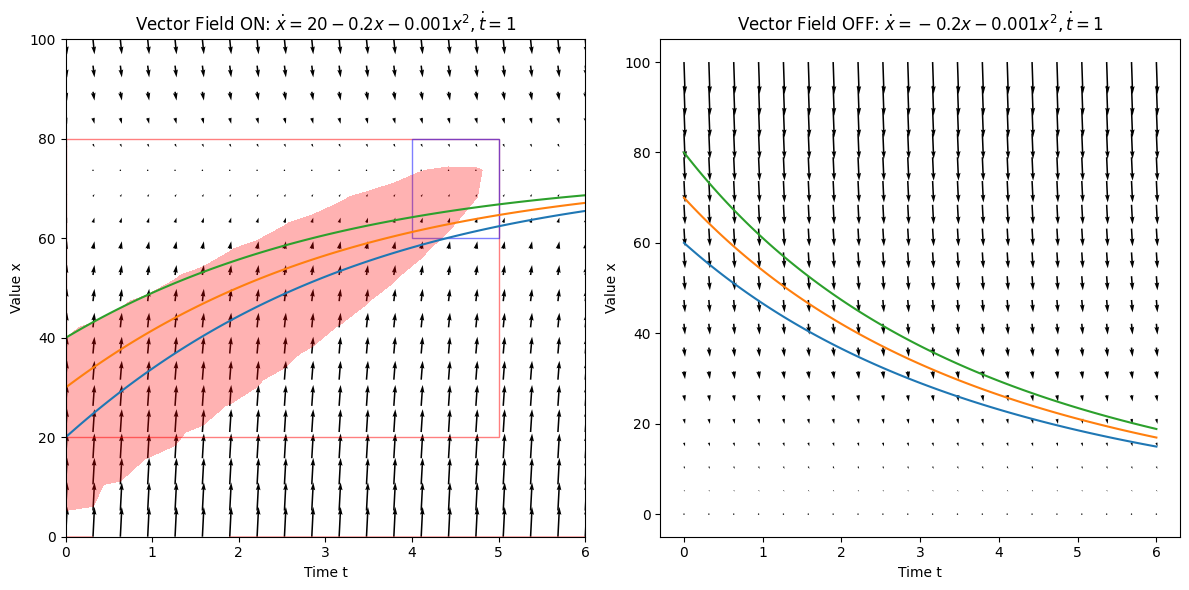

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.integrate import odeint

def vector_field_ON(v,t):
    x,y = v
    dxdt = 20 - 0.2*x - 0.001*x**2
    dydt = 1
    return [dxdt,dydt]


# # 定义向量场
# def vector_field_ON(x, t):
#     dxdt = 20 - 0.2*x - 0.001*x**2
#     dtdt = 1
#     return dxdt, dtdt

def vector_field_OFF(v, t):
    x,y = v
    dxdt = -0.2*x - 0.001*x**2
    dtdt = 1
    return [dxdt, dtdt]
# 生成网格点
x_values = np.linspace(0, 100, 20)  # x取值从0到200，共20个点
t_values = np.linspace(0, 6, 20)   # t取值从0到10，共20个点

t = np.linspace(0,6,100)
X, T = np.meshgrid(x_values, t_values)

# 计算每个网格点上的向量
DX_ON, DT_ON = vector_field_ON([X, T],t)
DX_OFF, DT_OFF = vector_field_OFF([X,T], t)

solu0 = odeint(vector_field_ON,[20,0],t)
x0,t0 = solu0.T
solu1 = odeint(vector_field_ON,[30,0],t)
x1,t1 = solu1.T
solu2 = odeint(vector_field_ON,[40,0],t)
x2,t2 = solu2.T


eq = 1.63085783017+99.1673294555*X+1.4698825144*T+1.84348904879*T**2+19.1909923123*X**2+1.90421824165*X*T+141.681628368*X**3-0.777706365332*X**2*T+44.1153986519*X*T**2+2.87523634731*T**3-500.718009187*X**4-359.710358851*X**3*T-32.6623009835*X**2*T**2-2.15004716995*X*T**3+1.305923446*T**4+96.7862149354*X**5-947.499069372*X**4*T-557.027213569*X**3*T**2-76.6830202183*X**2*T**3+27.749969062*X*T**4+3.82466429006*T**5-2.07722562542*X**6+39.5340834083*X**5*T-169.622397174*X**4*T**2-444.209027419*X**3*T**3-94.4384810051*X**2*T**4-10.7431344436*X*T**5-0.0244285272076*T**6

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# 绘制向量场
ax1.quiver(T, X, DT_ON, DX_ON)  # 注意：quiver的参数顺序为(x, y, u, v)，其中(u, v)是向量分量
ax1.set_xlabel('Time t')
ax1.set_ylabel('Value x')
ax1.set_title('Vector Field ON: $\dot{x} = 20 - 0.2x - 0.001x^2, \dot{t} = 1$')

rect11 = Rectangle((0, 20), 5, 60, edgecolor='red', fill=False, alpha=0.5)
rect12 = Rectangle((4, 60), 1, 20, edgecolor='blue', fill=False, alpha=0.5)
ax1.add_patch(rect11)
ax1.add_patch(rect12)
ax1.contourf(T, X, eq, levels=[0,np.inf], alpha=0.3, colors='red')
ax1.plot(t0,x0)
ax1.plot(t1,x1)
ax1.plot(t2,x2)


solu0 = odeint(vector_field_OFF,[60,0],t)
x0,t0 = solu0.T
solu1 = odeint(vector_field_OFF,[70,0],t)
x1,t1 = solu1.T
solu2 = odeint(vector_field_OFF,[80,0],t)
x2,t2 = solu2.T


ax2.quiver(T, X, DT_OFF, DX_OFF)  # 注意：quiver的参数顺序为(x, y, u, v)，其中(u, v)是向量分量
ax2.set_xlabel('Time t')
ax2.set_ylabel('Value x')
ax2.set_title('Vector Field OFF: $\dot{x} = -0.2x - 0.001x^2, \dot{t} = 1$')
ax2.plot(t0,x0)
ax2.plot(t1,x1)
ax2.plot(t2,x2)

plt.tight_layout()
plt.show()

### Running Example - the polynomial one

#### State-time set approximation

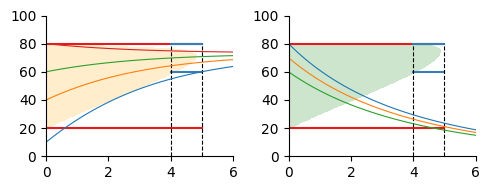

In [416]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.integrate import odeint

def vector_field_ON(v,t):
    x,y = v
    dxdt = 20 - 0.2*x - 0.001*x**2
    dydt = 1
    return [dxdt,dydt]


# # 定义向量场
# def vector_field_ON(x, t):
#     dxdt = 20 - 0.2*x - 0.001*x**2
#     dtdt = 1
#     return dxdt, dtdt

def vector_field_OFF(v, t):
    x,y = v
    dxdt = -0.2*x - 0.001*x**2
    dtdt = 1
    return [dxdt, dtdt]
# 生成网格点
x_values = np.linspace(0, 100, 30)  # x取值从0到200，共20个点
t_values = np.linspace(0, 6, 30)   # t取值从0到10，共20个点

t = np.linspace(0,6,100)
X, T = np.meshgrid(x_values, t_values)

# 计算每个网格点上的向量
DX_ON, DT_ON = vector_field_ON([X, T],t)
DX_OFF, DT_OFF = vector_field_OFF([X,T], t)

solu0 = odeint(vector_field_ON,[10,0],t)
x0,t0 = solu0.T
solu1 = odeint(vector_field_ON,[30,0],t)
x1,t1 = solu1.T
solu2 = odeint(vector_field_ON,[40,0],t)
x2,t2 = solu2.T
solu3 = odeint(vector_field_ON,[60,0],t)
x3,t3 = solu3.T
solu4 = odeint(vector_field_ON,[74,0],t)
x4,t4 = solu4.T
solu5 = odeint(vector_field_ON,[80,0],t)
x5,t5 = solu5.T
solu6 = odeint(vector_field_ON,[100,0],t)
x6,t6 = solu6.T

eq = 0.959019446074+108.758746368*X+2.0175571999*T+58.7466180446*X**2+1.42885165447*T**2-1.22966398256*X*T+114.030322478*X**3-77.8073102062*X**2*T+44.03799171*X*T**2+3.41902402772*T**3-949.95439927*X**4-688.894350771*X**3*T+29.4491121529*X**2*T**2+5.3219282935*X*T**3+1.5347363246*T**4+59.2737904158*X**5-467.42269403*X**4*T+781.736046249*X**3*T**2+174.697891081*X**2*T**3+44.7517834734*X*T**4+5.20944050634*T**5-0.589218071874*X**6+5.27628429722*X**5*T+4.02768186887*X**4*T**2-82.3129695582*X**3*T**3-172.925266999*X**2*T**4-30.6738440184*X*T**5-2.98851721035*T**6 

plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2))
# 绘制向量场
#ax1.quiver(T, X, DT_ON, DX_ON)  # 注意：quiver的参数顺序为(x, y, u, v)，其中(u, v)是向量分量
#ax1.set_xlabel('Time t')
#ax1.set_ylabel('State x')
#ax1.set_title('Vector Field ON: $\dot{x} = 20 - 0.2x - 0.001x^2, \dot{t} = 1$')

#rect11 = Rectangle((0, 20), 5, 60, edgecolor='#e41a1c', fill=False, alpha=0.5)
#rect12 = Rectangle((4, 60), 1, 20, edgecolor='blue', fill=False, alpha=0.5)
#ax1.add_patch(rect11)
#ax1.add_patch(rect12)
tt = np.linspace(0,5,100)
phi1_lb = 100*[20]
ax1.plot(tt,phi1_lb, color = '#e41a1c')
phi1_ub = 100*[80]
ax1.plot(tt,phi1_ub, color = '#e41a1c')

tt = np.linspace(4,5,100)
phi2_lb = 100*[60]
ax1.plot(tt,phi2_lb, color = '#377eb8')
phi2_ub = 100*[80]
ax1.plot(tt,phi2_ub, color = '#377eb8')

tt = 100*[4]
val_l = np.linspace(0,80,100)
ax1.plot(tt,val_l, color = 'black',linestyle='--', linewidth=0.8)
tt = 100*[5]
val_l = np.linspace(0,80,100)
ax1.plot(tt,val_l, color = 'black',linestyle='--', linewidth=0.8)




ax1.contourf(T, X, eq, levels=[0,np.inf], alpha=0.2, colors='orange')
ax1.plot(t0,x0,linewidth=0.8)
#ax1.plot(t1,x1)
ax1.plot(t2,x2,linewidth=0.8)
ax1.plot(t3,x3,linewidth=0.8)
#ax1.plot(t4,x4)
ax1.plot(t5,x5,linewidth=0.8)
#ax1.plot(t6,x6)
ax1.spines['top'].set_visible(False)  # 隐藏上边框
ax1.spines['right'].set_visible(False)  # 隐藏右边框




t = np.linspace(0,6,100)
solu0 = odeint(vector_field_OFF,[80,0],t)
x0,t0 = solu0.T
solu1 = odeint(vector_field_OFF,[70,0],t)
x1,t1 = solu1.T
solu2 = odeint(vector_field_OFF,[60,0],t)
x2,t2 = solu2.T


eq = 146.315483313+22.3788157814*X-144.822409617*T+90.109083825*X**2+40.821113258*T**2-23.1536019647*X*T+68.2767719806*X**3-130.562642723*X**2*T+11.5525482807*X*T**2-130.153673833*T**3-950.604340892*X**4-721.020157797*X**3*T+48.0394673099*X**2*T**2-13.8693481868*X*T**3+21.6429280731*T**4+59.4431175318*X**5-480.58841944*X**4*T+826.976990473*X**3*T**2+179.211579773*X**2*T**3+20.952977034*X*T**4-128.269559545*T**5-0.590894516134*X**6+5.74907379058*X**5*T+2.85632815913*X**4*T**2-131.55196598*X**3*T**3-262.716450534*X**2*T**4-71.3010754316*X*T**5+7.91597170428*T**6 

tt = np.linspace(0,5,100)
phi1_lb = 100*[20]
ax2.plot(tt,phi1_lb, color = '#e41a1c')
phi1_ub = 100*[80]
ax2.plot(tt,phi1_ub, color = '#e41a1c')

tt = np.linspace(4,5,100)
phi2_lb = 100*[60]
ax2.plot(tt,phi2_lb, color = '#377eb8')
phi2_ub = 100*[80]
ax2.plot(tt,phi2_ub, color = '#377eb8')

tt = 100*[4]
val_l = np.linspace(0,80,100)
ax2.plot(tt,val_l, color = 'black',linestyle='--', linewidth=0.8)
tt = 100*[5]
val_l = np.linspace(0,80,100)
ax2.plot(tt,val_l, color = 'black',linestyle='--', linewidth=0.8)


#ax2.set_xlabel('Time t')
#ax2.set_ylabel('State x')
#ax2.set_title('Vector Field OFF: $\dot{x} = -0.2x - 0.001x^2, \dot{t} = 1$')
ax2.contourf(T, X, eq, levels=[0,np.inf], alpha=0.2, colors='green')
ax2.plot(t0,x0,linewidth=0.8)
ax2.plot(t1,x1,linewidth=0.8)
ax2.plot(t2,x2,linewidth=0.8)
ax2.spines['top'].set_visible(False)  # 隐藏上边框
ax2.spines['right'].set_visible(False)  # 隐藏右边框

plt.savefig('../figures/Approx.pdf', format='pdf')
plt.tight_layout()
plt.show()

#### Switch Synthesis

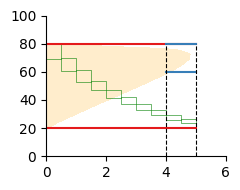

In [430]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.integrate import odeint


x_values = np.linspace(0, 100, 30)  # x取值从0到200，共20个点
t_values = np.linspace(0, 6, 30)   # t取值从0到10，共20个点

t = np.linspace(0,6,100)
X, T = np.meshgrid(x_values, t_values)

plt.style.use('default')
fig, ax2 = plt.subplots(1,1 , figsize=(2.5, 2))



eq = 0.959019446074+108.758746368*X+2.0175571999*T+58.7466180446*X**2+1.42885165447*T**2-1.22966398256*X*T+114.030322478*X**3-77.8073102062*X**2*T+44.03799171*X*T**2+3.41902402772*T**3-949.95439927*X**4-688.894350771*X**3*T+29.4491121529*X**2*T**2+5.3219282935*X*T**3+1.5347363246*T**4+59.2737904158*X**5-467.42269403*X**4*T+781.736046249*X**3*T**2+174.697891081*X**2*T**3+44.7517834734*X*T**4+5.20944050634*T**5-0.589218071874*X**6+5.27628429722*X**5*T+4.02768186887*X**4*T**2-82.3129695582*X**3*T**3-172.925266999*X**2*T**4-30.6738440184*X*T**5-2.98851721035*T**6 

tt = np.linspace(0,5,100)
phi1_lb = 100*[20]
ax2.plot(tt,phi1_lb, color = '#e41a1c')
phi1_ub = 100*[80]
ax2.plot(tt,phi1_ub, color = '#e41a1c')

tt = np.linspace(4,5,100)
phi2_lb = 100*[60]
ax2.plot(tt,phi2_lb, color = '#377eb8')
phi2_ub = 100*[80]
ax2.plot(tt,phi2_ub, color = '#377eb8')

tt = 100*[4]
val_l = np.linspace(0,80,100)
ax2.plot(tt,val_l, color = 'black',linestyle='--', linewidth=0.8)
tt = 100*[5]
val_l = np.linspace(0,80,100)
ax2.plot(tt,val_l, color = 'black',linestyle='--', linewidth=0.8)


#ax2.set_xlabel('Time t')
#ax2.set_ylabel('State x')
#ax2.set_title('Vector Field OFF: $\dot{x} = -0.2x - 0.001x^2, \dot{t} = 1$')
ax2.contourf(T, X, eq, levels=[0,np.inf], alpha=0.2, colors='orange')
ax2.spines['top'].set_visible(False)  # 隐藏上边框
ax2.spines['right'].set_visible(False)  # 隐藏右边框

rect0 = Rectangle((0, 68.8), 0.5, 11.2, edgecolor='green',linewidth=0.4,facecolor='none')
rect1 = Rectangle((0.5, 60.3), 0.5, 9.4, edgecolor='green',linewidth=0.4,facecolor='none')
rect2 = Rectangle((1, 53.1), 0.5, 61.1-53.1, edgecolor='green',linewidth=0.4,facecolor='none')
rect3 = Rectangle((1.5, 46.9), 0.5, 53.7-46.9, edgecolor='green',linewidth=0.4,facecolor='none')
rect4 = Rectangle((2, 41.5), 0.5, 47.4-41.5, edgecolor='green',linewidth=0.4,facecolor='none')
rect5 = Rectangle((2.5, 36.9), 0.5, 41.9-36.9, edgecolor='green',linewidth=0.4,facecolor='none')
rect6 = Rectangle((3, 32.8), 0.5, 37.2-32.8, edgecolor='green',linewidth=0.4,facecolor='none')
rect7 = Rectangle((3.5, 29.2), 0.5, 33.1-29.2, edgecolor='green',linewidth=0.4,facecolor='none')
rect8 = Rectangle((4, 26.1), 0.5, 29.5-26.1, edgecolor='green',linewidth=0.4,facecolor='none')
rect9 = Rectangle((4.5, 23.3), 0.5, 26.3-23.3, edgecolor='green',linewidth=0.4,facecolor='none')


ax2.add_patch(rect0)
ax2.add_patch(rect1)
ax2.add_patch(rect2)
ax2.add_patch(rect3)
ax2.add_patch(rect4)
ax2.add_patch(rect5)
ax2.add_patch(rect6)
ax2.add_patch(rect7)
ax2.add_patch(rect8)
ax2.add_patch(rect9)



plt.savefig('../figures/SwitchSyn.pdf', format='pdf')
plt.tight_layout()
plt.show()